In [1]:
import pandas as pd 
import numpy as np
from pymongo import *

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
##Metodo de Valuacion comparativa multicriterio CRITIC

In [3]:
#Tabla  
Tabla = pd.read_csv('ejemplo_libro.csv')
Tabla

,Comparables,Terreno,Edificacion,Garaje,Pisos,Dormitorios,Edad,precio de venta
0,1,104,171,2,2,3,5,130000.0
1,2,161,138,2,2,2,7,100000.0
2,3,161,194,1,2,3,6,135000.0
3,4,196,153,2,2,3,3,145000.0
4,5,238,200,1,1,3,6,145000.0
5,6,186,200,2,2,3,10,155000.0
6,7,132,218,2,2,3,5,170000.0
7,8,200,238,2,2,3,4,170000.0
8,9,154,168,1,2,3,1,132000.0
9,10,185,141,2,2,3,3,145000.0


#### Matriz de correlacion de los datos disponibles. Sirve para observar la relacion entre datos 

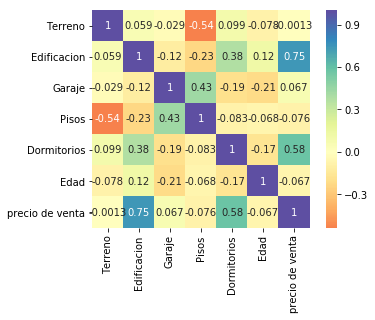

In [4]:
import seaborn as sns 
corr = Tabla.corr() 
sns.heatmap(corr, 
      xticklabels=corr.columns.values, 
      yticklabels=corr.columns.values, annot=True,
           center=0,
            #cmap="OrRd",
            cmap="Spectral",
           square=True)



### Se calcula el coeficiente de correlacion del precio con respecto a las otras variables

In [5]:
corr['precio de venta']

Terreno           -0.001250
Edificacion        0.747465
Garaje             0.067428
Pisos             -0.076497
Dormitorios        0.579194
Edad              -0.067442
precio de venta    1.000000
Name: precio de venta, dtype: float64

###### Se observa que existe una alta correlacion entre el precio y las variables de edificacion (0.74), y dormitorios (0.57), mientras que el resto de variables es muy baja, por lo que para la proyeccion solo tomaremos en cuenta las variables con mayor correlacion (Edificacion y dormitorios

In [6]:
#proyeccion = pd.DataFrame(list(Tabla['Terreno','Dormitorios']))
Proyeccion = Tabla[['Comparables','Edificacion','Dormitorios','precio de venta']]





In [7]:
Proy_sum = Proyeccion.sum()
Proy_sum

Comparables        123456789101112Inmueble a valorar
Edificacion                                     2296
Dormitorios                                       38
precio de venta                            1.677e+06
dtype: object

In [8]:
sum_edif = Proy_sum[1]
sum_dorm = Proy_sum[2]

In [9]:
Proy_norm = Proyeccion

In [10]:

Proy_norm['Edificacion'] = pd.DataFrame(Proyeccion['Edificacion']/sum_edif)
Proy_norm['Dormitorios'] = pd.DataFrame(Proyeccion['Dormitorios']/sum_dorm)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


##### Visualizar tabla normalizada en la suma

In [11]:
Proy_norm

,Comparables,Edificacion,Dormitorios,precio de venta
0,1,0.074477,0.078947,130000.0
1,2,0.060105,0.052632,100000.0
2,3,0.084495,0.078947,135000.0
3,4,0.066638,0.078947,145000.0
4,5,0.087108,0.078947,145000.0
5,6,0.087108,0.078947,155000.0
6,7,0.094948,0.078947,170000.0
7,8,0.103659,0.078947,170000.0
8,9,0.073171,0.078947,132000.0
9,10,0.061411,0.078947,145000.0


#### verificamos que la suma nos da 1

In [12]:
Proy_norm.sum()

Comparables        123456789101112Inmueble a valorar
Edificacion                                        1
Dormitorios                                        1
precio de venta                            1.677e+06
dtype: object

#### calculamos la desviacion estandar

In [13]:
Proy_norm.std()

Edificacion            0.013435
Dormitorios            0.007299
precio de venta    21612.811857
dtype: float64

##### Obtenemos la correlacion

In [14]:
Proy_norm.corr()

,Edificacion,Dormitorios,precio de venta
Edificacion,1.000000,0.376120,0.747465
Dormitorios,0.376120,1.000000,0.579194
precio de venta,0.747465,0.579194,1.000000
